## Overview

In [ ]:
import numpy as np
import pandas as pd
import xarray as xr

In [ ]:
data = xr.DataArray(np.random.randn(2,3),
                    dims=('x', 'y'),
                    coords={'x': [10,20]})

data

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.34345939, -0.46292499, -1.950736  ],
       [-0.80822203,  0.39672384, -0.97251945]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [ ]:
data.values

array([[ 0.34345939, -0.46292499, -1.950736  ],
       [-0.80822203,  0.39672384, -0.97251945]])

In [ ]:
type(data.values)

numpy.ndarray

In [ ]:
data.dims

('x', 'y')

In [ ]:
data.coords

Coordinates:
  * x        (x) int64 10 20

In [ ]:
data.attrs

{}

### Indexing

In [ ]:
# positional and by integer label, like numpy
data[0, :]

<xarray.DataArray (y: 3)>
array([ 0.34345939, -0.46292499, -1.950736  ])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [ ]:
# loc or "location": positional and coordinate label, like pandas
data.loc[10]

<xarray.DataArray (y: 3)>
array([ 0.34345939, -0.46292499, -1.950736  ])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [ ]:
# isel or "integer select": by dimension name and integer label
data.isel(x=0)

<xarray.DataArray (y: 3)>
array([ 0.34345939, -0.46292499, -1.950736  ])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [ ]:
# sel or "select": by dimension name and coordinate label
data.sel(x=10)

<xarray.DataArray (y: 3)>
array([ 0.34345939, -0.46292499, -1.950736  ])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

### Attributes
When setting up a DataArray, it's a good idea to set metadata attributes.

In [ ]:
data.attrs['long_name'] = 'random velocity'
data.attrs['units'] = 'meters/sec'
data.attrs['description'] = 'A random variable created as an example'
data.attrs['random_attribute'] = 123

data

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.34345939, -0.46292499, -1.950736  ],
       [-0.80822203,  0.39672384, -0.97251945]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             meters/sec
    description:       A random variable created as an example
    random_attribute:  123

In [ ]:
np.sin(data)

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.33674645, -0.44656715, -0.92868701],
       [-0.72306012,  0.38639872, -0.82630734]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [ ]:
data.T

<xarray.DataArray (y: 3, x: 2)>
array([[ 0.34345939, -0.80822203],
       [-0.46292499,  0.39672384],
       [-1.950736  , -0.97251945]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             meters/sec
    description:       A random variable created as an example
    random_attribute:  123

In [ ]:
data.sum()

<xarray.DataArray ()>
array(-3.45421924)

### GroupBy example

In [ ]:
labels = xr.DataArray(['E', 'F', 'E'], [data.coords['y']], name='labels')
labels

<xarray.DataArray 'labels' (y: 3)>
array(['E', 'F', 'E'], dtype='<U1')
Coordinates:
  * y        (y) int64 0 1 2

In [ ]:
data.groupby(labels).mean('y')

<xarray.DataArray (x: 2, labels: 2)>
array([[-0.80363831, -0.46292499],
       [-0.89037074,  0.39672384]])
Coordinates:
  * x        (x) int64 10 20
  * labels   (labels) object 'E' 'F'

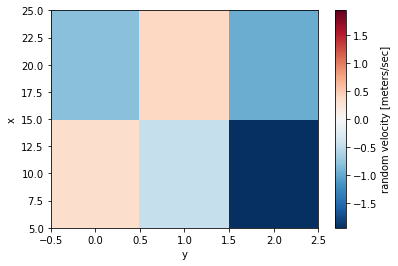

In [ ]:
data.plot()

### Datasets

In [ ]:
ds = xr.Dataset({'foo': data,
                 'bar': ('x', [1, 2]),
                 'baz': np.pi})

ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 0.3435 -0.4629 -1.951 -0.8082 0.3967 -0.9725
    bar      (x) int64 1 2
    baz      float64 3.142

### Saving and loading
NetCDF is the recommended format.

In [ ]:
ds.to_netcdf('example.nc')

In [ ]:
x = xr.open_dataset('example.nc')
x

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 ...
    bar      (x) int64 ...
    baz      float64 ...

## DataArray

In [ ]:
?xr.DataArray

Init signature:
xr.DataArray(
    data: Any = <NA>,
    coords: Union[Sequence[Tuple], Mapping[Hashable, Any], NoneType] = None,
    dims: Union[Hashable, Sequence[Hashable], NoneType] = None,
    name: Hashable = None,
    attrs: Mapping = None,
    indexes: Dict[Hashable, pandas.core.indexes.base.Index] = None,
    fastpath: bool = False,
)
Docstring:     
N-dimensional array with labeled coordinates and dimensions.

DataArray provides a wrapper around numpy ndarrays that uses labeled
dimensions and coordinates to support metadata aware operations. The API is
similar to that for the pandas Series or DataFrame, but DataArray objects
can have any number of dimensions, and their contents have fixed data
types.

Additional features over raw numpy arrays:

- Apply operations over dimensions by name: ``x.sum('time')``.
- Select or assign values by integer location (like numpy): ``x[:10]``
  or by label (like pandas): ``x.loc['2014-01-01']`` or
  ``x.sel(time='2014-01-01')``.
- Mathematical

In [ ]:
data = np.random.randn(4,3)
locs = ['IA', 'IL', 'IN']
times = pd.date_range('2000-01-01', periods=4)

da = xr.DataArray(data, coords=[times, locs], dims=['time', 'space'])

da

<xarray.DataArray (time: 4, space: 3)>
array([[ 1.23897824, -0.50397658,  0.52884644],
       [ 0.28392284,  0.89488413,  1.15145111],
       [ 0.35966487, -0.74219201,  0.42086507],
       [ 0.91730451,  0.90061316,  0.36556488]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [ ]:
xr.DataArray(data)

<xarray.DataArray (dim_0: 4, dim_1: 3)>
array([[ 1.23897824, -0.50397658,  0.52884644],
       [ 0.28392284,  0.89488413,  1.15145111],
       [ 0.35966487, -0.74219201,  0.42086507],
       [ 0.91730451,  0.90061316,  0.36556488]])
Dimensions without coordinates: dim_0, dim_1

In [ ]:
# It will return the coords
da['time']

<xarray.DataArray 'time' (time: 4)>
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04

In [ ]:
da.coords['time']

<xarray.DataArray 'time' (time: 4)>
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04

In [ ]:
temp = xr.DataArray(data, dims=('time', 'space'))

temp['time']

<xarray.DataArray 'time' (time: 4)>
array([0, 1, 2, 3])
Dimensions without coordinates: time

## Dataset

In [ ]:
latitude  = [f'lat_{x}' for x in range(5)]
longitude = [f'long_{x}' for x in range(7)]
time_stamps = [f'time_{x}' for x in range(10)]

temperature = np.random.randn(5, 7, 10) # lat, long, time
percipitation = np.random.randn(5, 7, 10) # lat, long, time

In [ ]:
# We can combine all the above data into a a DataArray where we would need to concatenate the arrays
da = xr.DataArray(data = np.stack((temperature, percipitation)),
             coords = {
                 'type': ['temperature', 'percipitation'],
                 'latitude': latitude,
                 'longitude': longitude,
                 'time': time_stamps,
             },
             dims = ('type', 'latitude', 'longitude', 'time'))

da

<xarray.DataArray (type: 2, latitude: 5, longitude: 7, time: 10)>
array([[[[ 4.47082280e-01,  1.88325936e-01, -1.65918865e+00,
           1.96480075e+00,  6.98552249e-01,  2.10955846e-02,
           5.31266582e-01, -2.64638148e-01,  7.87175419e-02,
           7.03485520e-01],
         [ 7.85183837e-02,  1.72373696e+00, -9.65377936e-01,
           5.98948995e-01, -1.27011106e+00, -7.63483334e-01,
           1.37769508e-01,  7.87209551e-01, -2.54826616e-01,
          -1.53759980e+00],
         [ 8.57916718e-01, -3.90329906e-01, -1.54942226e-01,
          -8.53896468e-01, -1.92076695e-01,  1.15669759e+00,
          -5.49514847e-01, -1.60112365e+00, -8.44298420e-01,
          -1.26316434e+00],
         [ 1.81813781e+00,  1.42282242e+00, -1.48482163e+00,
           1.82004470e-01, -1.39025368e+00,  5.29204619e-01,
           7.49478325e-01,  1.28561092e+00,  1.47027226e+00,
           9.43837720e-01],
         [ 8.42901554e-01, -2.91785660e-01, -7.14993131e-01,
           7.20818304e-01,  1.58972556e+00, -8.33146239e-01,
           2.51293524e+00,  4.13376553e-01, -1.15030723e+00,
           7.58735368e-01],
         [-2.12996285e+00, -2.40198756e-01, -2.12210377e+00,
           9.65198272e-01,  1.24345220e+00,  1.06780432e+00,
          -1.05646966e+00, -3.44437988e-01, -9.58907488e-01,
          -1.50462941e-01],
         [ 6.32816549e-01,  1.99637604e+00,  3.23199055e-02,
           6.39374009e-02,  7.72283669e-01,  3.37877926e-01,
          -5.78279517e-03,  1.13145345e+00, -3.03170748e-01,
           1.43652658e+00]],

        [[-1.46075130e-02,  1.08242456e+00,  5.67060448e-01,
          -2.86864954e-01,  5.66171025e-01,  3.76389567e-01,
          -2.66608668e-01,  2.12104874e+00,  8.08504260e-01,
          -1.01268815e+00],
         [ 4.16540149e-01, -1.00675499e-02,  4.97299842e-01,
          -2.33661833e-01,  6.32385643e-01,  4.97859116e-01,
          -3.92504378e-01, -3.27737871e-01, -4.91882335e-02,
           1.53466583e+00],
         [ 2.12841515e-02, -1.32696704e+00, -6.02513124e-01,
          -8.56689905e-01, -9.21479647e-01, -5.44468247e-01,
           3.61380503e-01,  1.64537304e+00, -8.97327640e-01,
           3.36621871e-02],
         [ 1.34930009e-01,  1.56130366e+00, -7.33810358e-01,
          -5.30501942e-01, -1.29241566e+00,  4.81763921e-01,
           3.04834855e-01,  1.84299323e+00,  1.29405763e+00,
          -3.60854347e-01],
         [ 1.70391353e+00,  5.20875619e-01, -9.39673086e-02,
          -1.41955578e-01, -6.40285755e-01,  1.36969125e+00,
           6.49649564e-01, -5.60591897e-01,  1.79905082e+00,
          -5.77566757e-01],
         [-1.10154643e+00,  7.72232113e-01, -3.39117082e-01,
          -1.66640288e+00, -2.05469398e-01,  1.40308338e+00,
          -7.61560096e-01,  8.80326266e-01, -1.13936494e+00,
          -5.63570449e-01],
         [-1.44480760e+00,  4.63246613e-01,  5.81894693e-01,
          -7.54153399e-01, -6.87779723e-02, -9.20962186e-01,
           7.93750677e-02, -1.22943674e+00,  1.23499065e+00,
          -6.74342807e-01]],

        [[-8.36659114e-01, -1.29182103e+00,  1.88148694e+00,
          -6.53348563e-01, -8.46004026e-01, -4.41520977e-02,
          -2.76054883e-01, -8.46625688e-01, -2.60585400e-01,
           1.29195018e+00],
         [-5.77618276e-01,  1.69487356e-01, -6.44966796e-01,
           4.84038798e-01, -4.64464691e-01,  1.06838558e+00,
           2.79462948e-01, -4.29643808e-02,  4.08872780e-02,
          -1.25191673e+00],
         [ 5.37682611e-01,  7.37622047e-01,  3.23784140e-01,
          -5.87974666e-01,  3.05068113e-01, -4.69658112e-01,
          -5.70152918e-01, -1.53927468e+00, -3.99153429e-02,
           1.21876832e+00],
         [ 1.13971663e+00,  2.10148952e+00, -7.53603391e-01,
          -4.28045255e-02, -9.71322011e-01,  9.27275786e-01,
           5.46093109e-01, -3.08377839e-01, -1.39184711e+00,
           4.34415911e-01],
         [-6.41474500e-01,  6.51804949e-01, -6.03503320e-01,
          -1.88860212e+00, -6.53414353e-01,  8.68952115e-01,
          

In the above example we kind of introduced complexity as we had to stack two arrays and introduce a new dimension named `type`. We can see that in the above example for both the arrays (temperature and percipitation) they share the same dims. `Dataset` can help in this case.

In [ ]:
# First let's create temperature and percipitation DataArrays
temp_da = xr.DataArray(temperature,
                       coords = {
                           'latitude': latitude,
                           'longitude': longitude,
                           'time': time_stamps,
                       },
                       dims = ('latitude', 'longitude', 'time'))

percip_da = xr.DataArray(percipitation,
                       coords = {
                           'latitude': latitude,
                           'longitude': longitude,
                           'time': time_stamps,
                       },
                       dims = ('latitude', 'longitude', 'time'))

# Create Dataset
ds = xr.Dataset({
        'temperature': temp_da,
        'percipitation': percip_da,
     })

ds

<xarray.Dataset>
Dimensions:        (latitude: 5, longitude: 7, time: 10)
Coordinates:
  * latitude       (latitude) <U5 'lat_0' 'lat_1' 'lat_2' 'lat_3' 'lat_4'
  * longitude      (longitude) <U6 'long_0' 'long_1' ... 'long_5' 'long_6'
  * time           (time) <U6 'time_0' 'time_1' 'time_2' ... 'time_8' 'time_9'
Data variables:
    temperature    (latitude, longitude, time) float64 0.4471 0.1883 ... 0.3668
    percipitation  (latitude, longitude, time) float64 1.462 0.08076 ... 0.6167

In [ ]:
ds['temperature']

<xarray.DataArray 'temperature' (latitude: 5, longitude: 7, time: 10)>
array([[[ 4.47082280e-01,  1.88325936e-01, -1.65918865e+00,
          1.96480075e+00,  6.98552249e-01,  2.10955846e-02,
          5.31266582e-01, -2.64638148e-01,  7.87175419e-02,
          7.03485520e-01],
        [ 7.85183837e-02,  1.72373696e+00, -9.65377936e-01,
          5.98948995e-01, -1.27011106e+00, -7.63483334e-01,
          1.37769508e-01,  7.87209551e-01, -2.54826616e-01,
         -1.53759980e+00],
        [ 8.57916718e-01, -3.90329906e-01, -1.54942226e-01,
         -8.53896468e-01, -1.92076695e-01,  1.15669759e+00,
         -5.49514847e-01, -1.60112365e+00, -8.44298420e-01,
         -1.26316434e+00],
        [ 1.81813781e+00,  1.42282242e+00, -1.48482163e+00,
          1.82004470e-01, -1.39025368e+00,  5.29204619e-01,
          7.49478325e-01,  1.28561092e+00,  1.47027226e+00,
          9.43837720e-01],
        [ 8.42901554e-01, -2.91785660e-01, -7.14993131e-01,
          7.20818304e-01,  1.58972556e+00, -8.33146239e-01,
          2.51293524e+00,  4.13376553e-01, -1.15030723e+00,
          7.58735368e-01],
        [-2.12996285e+00, -2.40198756e-01, -2.12210377e+00,
          9.65198272e-01,  1.24345220e+00,  1.06780432e+00,
         -1.05646966e+00, -3.44437988e-01, -9.58907488e-01,
         -1.50462941e-01],
        [ 6.32816549e-01,  1.99637604e+00,  3.23199055e-02,
          6.39374009e-02,  7.72283669e-01,  3.37877926e-01,
         -5.78279517e-03,  1.13145345e+00, -3.03170748e-01,
          1.43652658e+00]],

       [[-1.46075130e-02,  1.08242456e+00,  5.67060448e-01,
         -2.86864954e-01,  5.66171025e-01,  3.76389567e-01,
         -2.66608668e-01,  2.12104874e+00,  8.08504260e-01,
         -1.01268815e+00],
        [ 4.16540149e-01, -1.00675499e-02,  4.97299842e-01,
         -2.33661833e-01,  6.32385643e-01,  4.97859116e-01,
         -3.92504378e-01, -3.27737871e-01, -4.91882335e-02,
          1.53466583e+00],
        [ 2.12841515e-02, -1.32696704e+00, -6.02513124e-01,
         -8.56689905e-01, -9.21479647e-01, -5.44468247e-01,
          3.61380503e-01,  1.64537304e+00, -8.97327640e-01,
          3.36621871e-02],
        [ 1.34930009e-01,  1.56130366e+00, -7.33810358e-01,
         -5.30501942e-01, -1.29241566e+00,  4.81763921e-01,
          3.04834855e-01,  1.84299323e+00,  1.29405763e+00,
         -3.60854347e-01],
        [ 1.70391353e+00,  5.20875619e-01, -9.39673086e-02,
         -1.41955578e-01, -6.40285755e-01,  1.36969125e+00,
          6.49649564e-01, -5.60591897e-01,  1.79905082e+00,
         -5.77566757e-01],
        [-1.10154643e+00,  7.72232113e-01, -3.39117082e-01,
         -1.66640288e+00, -2.05469398e-01,  1.40308338e+00,
         -7.61560096e-01,  8.80326266e-01, -1.13936494e+00,
         -5.63570449e-01],
        [-1.44480760e+00,  4.63246613e-01,  5.81894693e-01,
         -7.54153399e-01, -6.87779723e-02, -9.20962186e-01,
          7.93750677e-02, -1.22943674e+00,  1.23499065e+00,
         -6.74342807e-01]],

       [[-8.36659114e-01, -1.29182103e+00,  1.88148694e+00,
         -6.53348563e-01, -8.46004026e-01, -4.41520977e-02,
         -2.76054883e-01, -8.46625688e-01, -2.60585400e-01,
          1.29195018e+00],
        [-5.77618276e-01,  1.69487356e-01, -6.44966796e-01,
          4.84038798e-01, -4.64464691e-01,  1.06838558e+00,
          2.79462948e-01, -4.29643808e-02,  4.08872780e-02,
         -1.25191673e+00],
        [ 5.37682611e-01,  7.37622047e-01,  3.23784140e-01,
         -5.87974666e-01,  3.05068113e-01, -4.69658112e-01,
         -5.70152918e-01, -1.53927468e+00, -3.99153429e-02,
          1.21876832e+00],
        [ 1.13971663e+00,  2.10148952e+00, -7.53603391e-01,
         -4.28045255e-02, -9.71322011e-01,  9.27275786e-01,
          5.46093109e-01, -3.08377839e-01, -1.39184711e+00,
          4.34415911e-01],
        [-6.41474500e-01,  6.51804949e-01, -6.03503320e-01,
         -1.88860212e+00, -6.53414353e-01,  8.68952115e-01,
         -1.42410059e+00,  3.27591694e-01, -9.83548722e-02,
         -3.0490884

## Indexing and Selecting Data

In [ ]:
latitude  = [f'lat_{x}' for x in range(2)]
longitude = [f'long_{x}' for x in range(3)]

temperature = np.random.randn(2, 3) # lat, long, time

da = xr.DataArray(data = temperature,
                 coords = {
                     'latitude': latitude,
                     'longitude': longitude,
                 },
                 dims = ('latitude', 'longitude'))

da

<xarray.DataArray (latitude: 2, longitude: 3)>
array([[-1.19488346, -0.37699944, -0.83201202],
       [ 0.55794168, -0.7171424 , -0.50806347]])
Coordinates:
  * latitude   (latitude) <U5 'lat_0' 'lat_1'
  * longitude  (longitude) <U6 'long_0' 'long_1' 'long_2'

In [ ]:
da.values

array([[-1.19488346, -0.37699944, -0.83201202],
       [ 0.55794168, -0.7171424 , -0.50806347]])

In [ ]:
da[0,2].values

array(-0.83201202)

In [ ]:
da.loc['lat_0', 'long_1'].values

array(-0.37699944)

In [ ]:
da.isel(latitude=0).values

array([-1.19488346, -0.37699944, -0.83201202])

In [ ]:
# The av=bove is same as 
da[dict(latitude=0)].values

array([-1.19488346, -0.37699944, -0.83201202])

In [ ]:
da.sel(latitude='lat_1').values

array([ 0.55794168, -0.7171424 , -0.50806347])

In [ ]:
# The above is same as
da.loc[dict(latitude='lat_1')].values

array([ 0.55794168, -0.7171424 , -0.50806347])

### Indexing with dimension names

In [ ]:
latitude  = [f'lat_{x}' for x in range(2)]
longitude = [f'long_{x}' for x in range(3)]
time_stamps = [f'time_{x}' for x in range(5)]

temperature = np.random.randn(2, 3, 5) # lat, long, time

da = xr.DataArray(data = temperature,
                 coords = {
                     'latitude': latitude,
                     'longitude': longitude,
                     'time': time_stamps,
                 },
                 dims = ('latitude', 'longitude', 'time'))


da.values

array([[[-2.19999848,  0.60035589,  0.3138689 , -1.34548462,
          0.5856584 ],
        [-1.08251151,  0.08987359, -0.61163246,  0.78603542,
         -2.32751104],
        [ 0.20233695,  0.02227249, -0.71950543,  0.36714685,
          0.60950142]],

       [[-0.25423416,  1.41147933, -0.23429217,  1.13515727,
          0.61161487],
        [ 0.78062272, -0.40739367, -0.1340985 ,  2.08598546,
          0.09458488],
        [ 1.03933086,  0.7279347 ,  0.3559329 , -0.51714241,
         -0.68835698]]])

In [ ]:
da.isel(latitude=0, time=slice(None, 2)).values

array([[-2.19999848,  0.60035589],
       [-1.08251151,  0.08987359],
       [ 0.20233695,  0.02227249]])

In [ ]:
da.sel(latitude='lat_0', time=slice(None, 'time_1')).values

array([[-2.19999848,  0.60035589],
       [-1.08251151,  0.08987359],
       [ 0.20233695,  0.02227249]])

### Nearest neighbor lookups

In [ ]:
da = xr.DataArray([1, 2, 3], [('x', [0, 1, 2])])
da

<xarray.DataArray (x: 3)>
array([1, 2, 3])
Coordinates:
  * x        (x) int64 0 1 2

In [ ]:
da.sel(x=[1.1, 1.9], method='nearest').values

array([2, 3])

In [ ]:
da.sel(x=0.1, method='backfill').values

array(2)

In [ ]:
da.sel(x=[0.5, 1, 1.9, 2, 2.5, 1.3], method='pad').values

array([1, 2, 2, 3, 3, 2])

In [ ]:
da.reindex(x=[1.1, 1.5], method='nearest', tolerance=0.2).values

array([ 2., nan])